# Purpose of the Notebook is to Aggregate Data Online on Price per Kg on launches, and do some prelimiary data analysis/comparison between the data

In [149]:
# Package imports
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

## 1. Scrape NewSpace website for table that includes Price Per Kg

Notes: \
a.Couldn't seem to find historical launch cost/kg - might look into it a bit more later \
b. Northrop Grumman	Pegasus (XL), Founded in 1994 but first launch in 1990 - double check data source

https://www.newspace.im/launchers

In [150]:
# URL
url = "https://www.newspace.im/launchers"

# HTTP Request
response = requests.get(url)
content = response.content

# Parse
soup = BeautifulSoup(content, "html.parser")

# Query Table
table = soup.find("table")
headers = [header.text.strip() for header in table.findAll("th")]


rows = table.findAll("tr")[1:]  # Skip the header row
data = []
for row in rows:
    rowData = [cell.text.strip() for cell in row.findAll("td")]
    data.append(rowData)

In [151]:
df_new_space = pd.DataFrame(data, columns=headers)
df_new_space

,Organization,Launcher,Founded,Status,First Launch,Launches,Cost,Performance,Price per kg,Funding,Logo,Photo
0,Northrop Grumman,Pegasus (XL),1994,Operational,1990,45,$56M,443 kg,126410 $/kg,Yes,,
1,MITT,Start-1,1991,Operational,1993,7,-,167 kg,-,Yes,,
2,Northrop Grumman,Minotaur C (Taurus-XL),1989,Operational,1994,12,$50M,1054 kg,47440 $/kg,Yes,,
3,Lockheed Martin,Athena-1,1993,Retired,1995,4,$17M,794 kg,21410 $/kg,Yes,,
4,Lockheed Martin,Athena-2,1993,Retired,1998,3,$65M,1165 kg,55790 $/kg,Yes,,
5,Makeyev OKB,Shtil,1947,Retired,1998,2,-,160 kg,-,Yes,,
6,Northrop Grumman,Minotaur I,1997,Operational,2000,12,-,331 kg,-,Yes,,
7,CASC,Kaituozhe-1 (KT-1),1998,Retired,2002,2,-,100 kg,-,Yes,,
8,SpaceX,Falcon 1 / Falcon 1e,2002,Retired,2006,5,$11M,1000 kg,11000 $/kg,$1B+,,
9,KARI,Naro (KSLV-1),2002,Retired,2009,3,-,100 kg,-,$490M,,


Filter Down to Only Rows with Price per kg

In [152]:
df_new_space = df_new_space[df_new_space['Price per kg'] != '-']
# Remove the $/kg from the price per kg column 
df_new_space['Price per kg'] = df_new_space['Price per kg'].str.extract('(\d+)').astype(float)

<ipython-input-152-a78787aee4f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_space['Price per kg'] = df_new_space['Price per kg'].str.extract('(\d+)').astype(float)


Preliminary Data Visulization

In [153]:
def plot_distribution(df, column_name, title):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=10, edgecolor='black')
    # Set axis labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

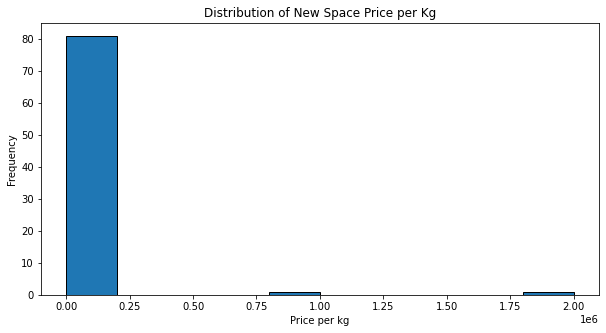

In [154]:
plot_distribution(df_new_space, 'Price per kg', 'Distribution of New Space Price per Kg')

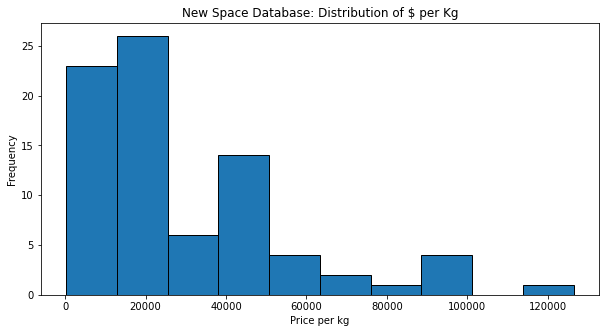

In [155]:
# Distribution between 0 and .25e6
plot_distribution(df_new_space[df_new_space['Price per kg'] <= 250000], 'Price per kg', 'New Space Database: Distribution of $ per Kg')

## 2. Graham Cost per KG https://docs.google.com/spreadsheets/d/1TPewJ64QNVtM5sbRDIXuMO3rsSSQ2ZZA2SwvMF6CEVg/edit#gid=0

In [156]:
df_graham = pd.read_csv('Rocket_Launch_Economy_Tracker.csv')
df_graham

,Platform,Country,First Flight,Inflation Adjusted LEO ($/kg) - 2020 USD,Source
0,SpaceX,USA,2020,50,2017 IAC Presentation
1,SpaceX Falcon 9,USA,2010,2600,SpaceX Capabilities & Services Documents
2,SpaceX Falcon Heavy,USA,2018,1500,SpaceX Capabilities & Services Documents
3,Delta E,USA,1965,177900,Koelle (1991) / Astronautix
4,Scout,USA,1961,118500,Koelle (1991) / Astronautix
5,Atlas Centaur,USA,1963,29500,Hammond (1999)
6,Titan II,USA,1964,30600,"Xu, Hollingsworth, and Smith (2019)"
7,Soyuz,Russia,1966,17900,FAA Office of Commercial Space Transportation ...
8,Titan III+,USA,1965,21000,"Xu, Hollingsworth, and Smith (2019)"
9,Kosmos,Russia,1962,14900,"Xu, Hollingsworth, and Smith (2019)"


### Cost per kg distribution for each country

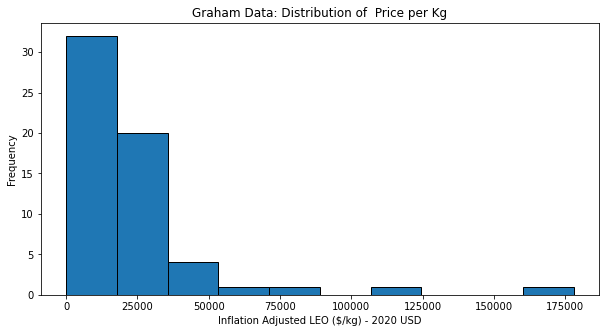

In [157]:
plot_distribution(df_graham, 'Inflation Adjusted LEO ($/kg) - 2020 USD', 'Graham Data: Distribution of  Price per Kg')

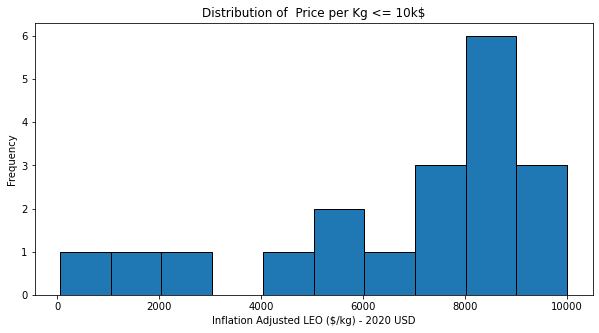

In [158]:
# Filter below 10 k 
plot_distribution(df_graham[df_graham['Inflation Adjusted LEO ($/kg) - 2020 USD'] <= 10000] , 'Inflation Adjusted LEO ($/kg) - 2020 USD', 'Distribution of  Price per Kg <= 10k$')

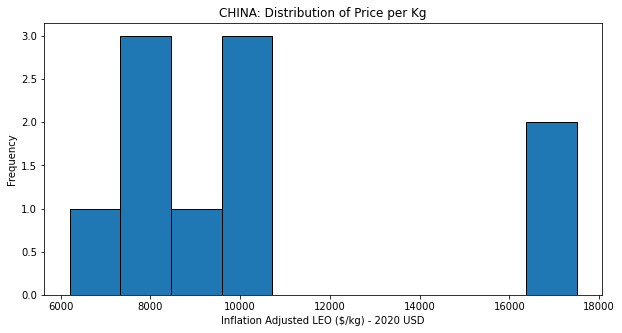

In [159]:
# Plot China cost/kilo distribution
plot_distribution(df_graham[df_graham['Country'] == 'China'] , 'Inflation Adjusted LEO ($/kg) - 2020 USD', 'CHINA: Distribution of Price per Kg')

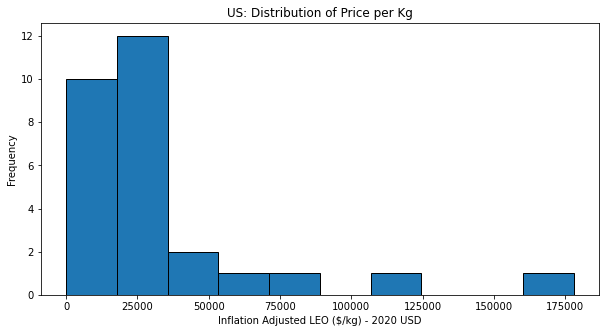

In [160]:
# Plot USA cost/kilo distribution
plot_distribution(df_graham[df_graham['Country'] == 'USA'] , 'Inflation Adjusted LEO ($/kg) - 2020 USD', 'US: Distribution of Price per Kg')

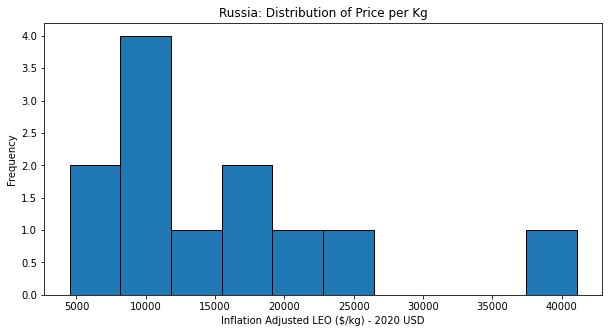

In [161]:
# Plot russian cost/kilo distribution
plot_distribution(df_graham[df_graham['Country'] == 'Russia'] , 'Inflation Adjusted LEO ($/kg) - 2020 USD', 'Russia: Distribution of Price per Kg')

## 3. CSIS Aerospace Security Project Data 

Notes: \
    a. Cost estimates are inflated by the source to their dollar values in the fiscal year 2021. \
    b. Launch costs “include all direct and indirect manufacturing costs and their associated overhead plus recurring engineering, sustaining tooling, and quality control.” \
    c. Data Source : https://aerospace.csis.org/data/space-launch-to-low-earth-orbit-how-much-does-it-cost/ \
    (Table downloaded from https://ourworldindata.org/grapher/cost-space-launches-low-earth-orbit) \


In [162]:
df_aerospace = pd.read_csv('cost-space-launches-low-earth-orbit.csv')
# Uncomment to take a look at entire dataframe in jupyter
# pd.set_option('display.max_rows', None)
df_aerospace

,Entity,Code,Year,cost_per_kg,launch_class
0,Angara,NaN,2014,4500,Heavy
1,Antares,NaN,2013,13600,Medium
2,Ariane 44,NaN,1988,18300,Medium
3,Ariane 5G,NaN,1997,10200,Heavy
4,Athena 1,NaN,1997,19200,Small
5,Atlas Centaur,NaN,1963,29500,Medium
6,Atlas II,NaN,1991,18700,Medium
7,Atlas III,NaN,2000,16000,Medium
8,Atlas V,NaN,2002,8100,Medium
9,Delta 3000-Series,NaN,1975,21400,Small


### Scatter Plot of the Prices Throughout the Years

In [163]:
def plot_year_cost(df, title):
    plt.figure(figsize=(20, 5))
    plt.scatter(df['Year'], df['cost_per_kg'])
    # Add entity Names
    for index, row in df.iterrows():
        plt.annotate(row['Entity'], (row['Year'], row['cost_per_kg']), fontsize=8, xytext=(5, 0), textcoords='offset points')
    
    plt.xlabel('Year')
    plt.ylabel('Cost per kg')
    plt.title(title)
    # Display the plot
    plt.show()

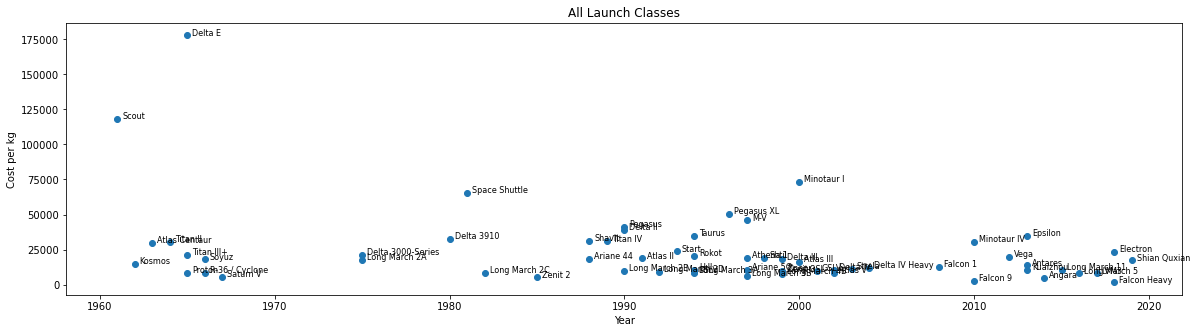

In [164]:
plot_year_cost(df_aerospace, 'All Launch Classes')

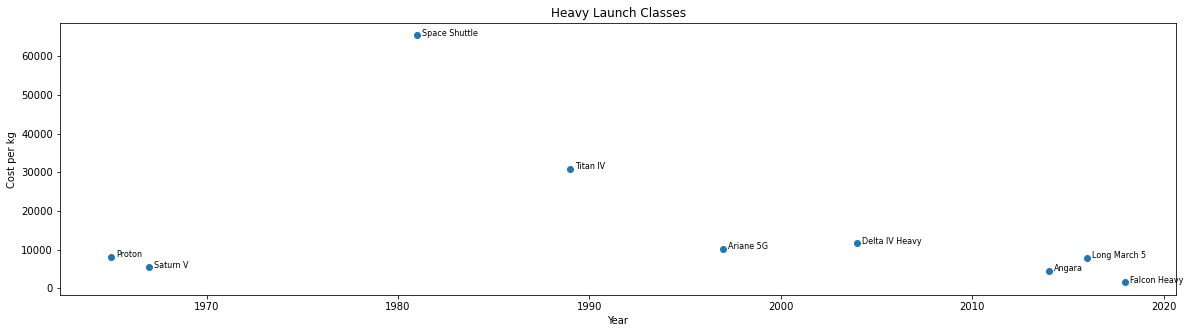

In [165]:
plot_year_cost(df_aerospace[df_aerospace['launch_class'] == 'Heavy'], 'Heavy Launch Classes')

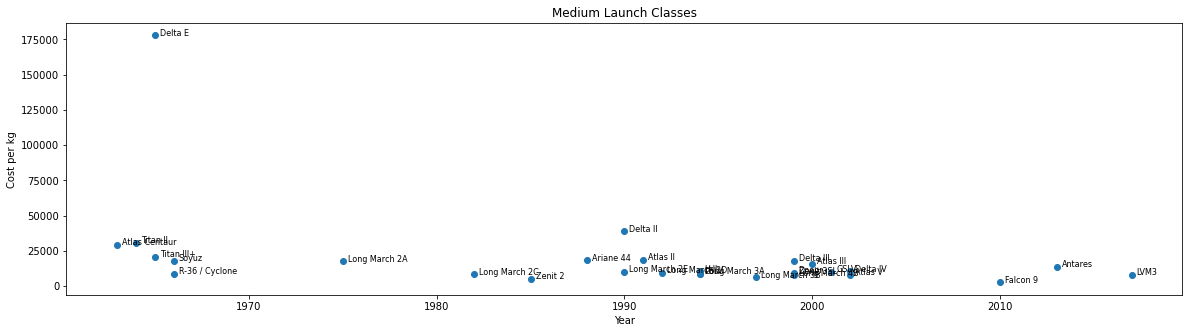

In [166]:
plot_year_cost(df_aerospace[df_aerospace['launch_class'] == 'Medium'], 'Medium Launch Classes')

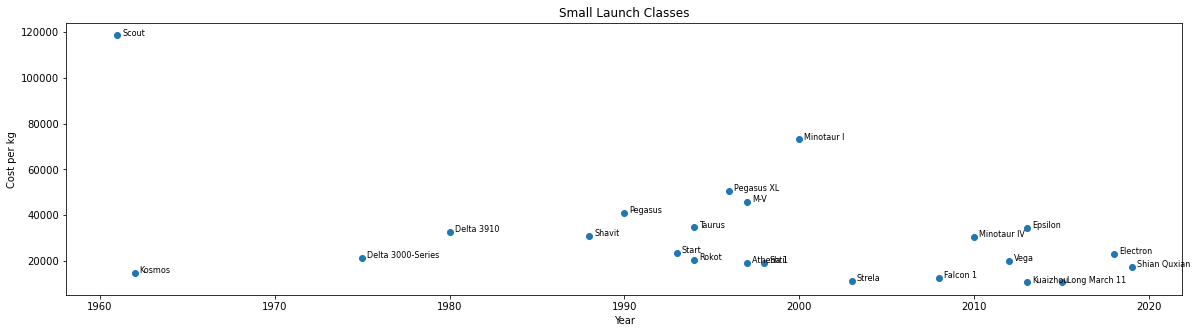

In [167]:
plot_year_cost(df_aerospace[df_aerospace['launch_class'] == 'Small'], 'Small Launch Classes')

## 4. Merge the three Data Sources 
Goal: \
a. Do a sanity check to see if there is not a large descrepency of cost per kg between each of the data sources \
b. Merge into One df with Entity and cost per kg, benchmarked to 2021 adjust prices  \
c. Clean to incorporate with Alex Luttman's Launch Dataset


In [168]:
# simplify df to just include columns of interest
df_aerospace_kg = df_aerospace.drop(['Code', 'Year', 'launch_class'], axis = 1)
df_graham_kg = df_graham.drop(['Country','First Flight', 'Source'], axis = 1)
df_new_space_kg = df_new_space[['Organization', 'Launcher', 'Price per kg']]

### String Similarity Matching using Levenshtein distance
Given that these strings are pretty similar up to a few letters, lets try using levenshtein to match the names between the dataframes and merge 

In [169]:
#!pip install fuzzywuzzy python-Levenshtein

In [170]:
import pandas as pd
from fuzzywuzzy import fuzz, process


def match_platform(entity, platforms, threshold=90):
    best_match = process.extractOne(entity, platforms)
    if best_match[1] >= threshold:
        return best_match[0]
    else:
        return None

# Create a dictionary with keys as 'entity' and values as the corresponding 'platform'
entity_to_platform = {}

for entity in df_aerospace_kg['Entity'].unique():
    matched_platform = match_platform(entity, df_graham_kg['Platform'].unique(), threshold=90)
    if matched_platform:
        entity_to_platform[entity] = matched_platform

# Map the 'entity' values in df1 to their corresponding 'platform' values
df_aerospace_kg['Platform'] = df_aerospace_kg['Entity'].map(entity_to_platform)

# Merge the two dataframes on the 'platform' column
merged_df = pd.merge(df_aerospace_kg, df_graham_kg, on='Platform', how = 'outer')

# Display the merged dataframe
output_data = merged_df[['cost_per_kg', 'Platform']]
# data to be used in conjunction with Alex's data
output_data.to_csv('cost_per_kg_aggregated.csv')

In [171]:
merged_df

,Entity,cost_per_kg,Platform,Inflation Adjusted LEO ($/kg) - 2020 USD
0,Angara,4500.0,Angaras,4500.0
1,Antares,13600.0,Antares,13600.0
2,Ariane 44,18300.0,Ariane 44,18300.0
3,Ariane 5G,10200.0,Ariane 5G,10200.0
4,Athena 1,19200.0,Athena 1,19200.0
5,Atlas Centaur,29500.0,Atlas Centaur,29500.0
6,Atlas II,18700.0,Atlas II,18700.0
7,Atlas III,16000.0,Atlas III,16000.0
8,Atlas V,8100.0,Atlas V,8100.0
9,Delta 3000-Series,21400.0,Delta 3000,21400.0


### WIP do the same on the third column df_new_space_kg
Note: \
a. Aerospace and graham data seems to match pretty well, with cost being the same and names matching \
b. NewSpace names not matching as well with levenschtein - but that's because the names have added characters - Work in progress (maybe not worth the effort)\
c. Looking at the data and doing some spot checks the costs don't match up, newspace on average has lower cost per kilo

In [172]:
def match_platform(entity, platforms, threshold=80):
    best_match = process.extractOne(entity, platforms)
    if best_match[1] >= threshold:
        return best_match[0]
    else:
        return None

# Create a dictionary with keys as 'entity' and values as the corresponding 'platform'
entity_to_platform = {}

all_platforms = pd.concat([df_graham_kg['Platform'], df_new_space_kg['Launcher']]).unique()

for entity in df_aerospace_kg['Entity'].unique():
    matched_platform = match_platform(entity, all_platforms, threshold=90)
    if matched_platform:
        entity_to_platform[entity] = matched_platform

# Map the 'entity' values in df1 to their corresponding 'platform' values
df_aerospace_kg['Platform'] = df_aerospace_kg['Entity'].map(entity_to_platform)

# Merge the three dataframes using outer joins
merged_df = pd.merge(df_aerospace_kg, df_graham_kg, on='Platform', how='outer')
merged_df = pd.merge(merged_df, df_new_space_kg, left_on='Platform', right_on='Launcher', how='outer', suffixes=('', '_df_new_space_kg'))

# Display the merged dataframe
merged_df

,Entity,cost_per_kg,Platform,Inflation Adjusted LEO ($/kg) - 2020 USD,Organization,Launcher,Price per kg
0,Angara,4500.0,Angaras,4500.0,NaN,NaN,NaN
1,Antares,13600.0,Antares,13600.0,NaN,NaN,NaN
2,Ariane 44,18300.0,Ariane 44,18300.0,NaN,NaN,NaN
3,Ariane 5G,10200.0,Ariane 5G,10200.0,NaN,NaN,NaN
4,Athena 1,19200.0,Athena 1,19200.0,NaN,NaN,NaN
5,Atlas Centaur,29500.0,Atlas Centaur,29500.0,NaN,NaN,NaN
6,Atlas II,18700.0,Atlas II,18700.0,NaN,NaN,NaN
7,Atlas III,16000.0,Atlas III,16000.0,NaN,NaN,NaN
8,Atlas V,8100.0,Atlas V,8100.0,NaN,NaN,NaN
9,Delta 3000-Series,21400.0,Delta 3000,21400.0,NaN,NaN,NaN
